In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df='F:/Pranjali/FLIP ROBO_Internship/Assignment_Worksheet/Assignment_Oct/16Oct2020/Assignment_23Oct/Company Stock and Investment_2.csv'

In [3]:
data = pd.read_csv(df, index_col=['Date'], parse_dates=['Date'])
data.head(10)

,Gold_Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
2010-08-01,-0.013097
2010-11-01,0.023297
2010-12-01,-0.001518
2010-01-13,-0.020847


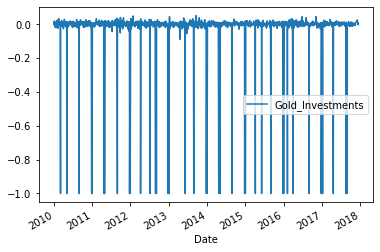

In [4]:
data.plot()

# Check stationarity of dataset using ACF function

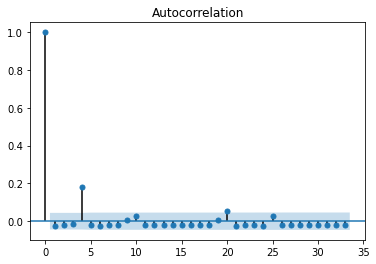

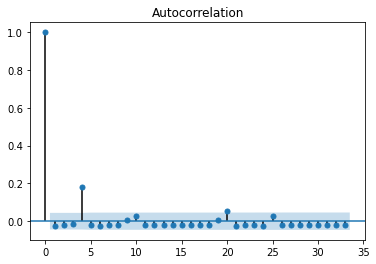

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

# Converting series to stationary

In [6]:
# Creating difference in dataset using diff function
# integrated oder of diff,demoted by d in ARIMA model

data_diff=data.diff(periods=1)  

In [7]:
data_diff=data_diff[1:]
data_diff.head()

,Gold_Investments
Date,
2010-04-01,0.000947
2010-05-01,0.000464
2010-06-01,0.004449
2010-07-01,-0.005788
2010-08-01,-0.013318


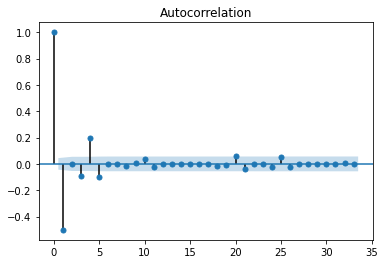

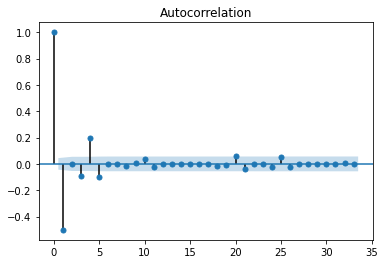

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_diff)

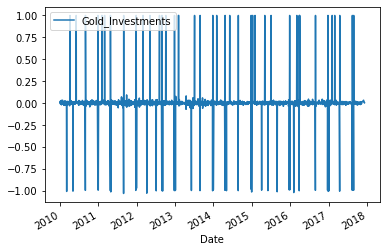

In [9]:
data_diff.plot()

# Applying Auto Regressive Model

# Prepare data for train & test

In [10]:
X=data.values
X.size

1984

In [11]:
train = X[0:1784]  #
test = X[1785:]    # 397 data for test
predictions = []

In [12]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit=model_ar.fit()

In [13]:
#predicting for test data
predictions = model_ar_fit.predict(start=1785,end=1984)

ValueError: negative dimensions are not allowed

In [14]:
test_size=model_ar_fit.predict(start=1785,end=1984)
test_size.size

ValueError: negative dimensions are not allowed

In [15]:
test.size

199

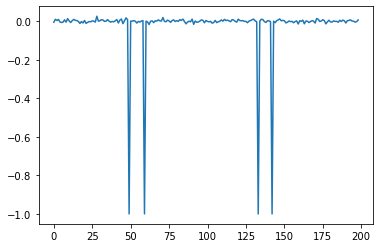

In [16]:
plt.plot(test)
plt.plot(predictions,color='red')

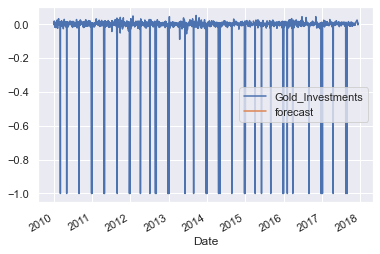

In [113]:
data.plot()

In [ ]:
# test prdiction is for 2016 -2017 

In [ ]:
Applying ARIMA Model

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
#p=period taken for auto-regressive model
#d=integrated order diff
#q=period in moving average model

model_arima = ARIMA(train,order=(9,1,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

-1979.8692014226235


In [20]:
#predicting for test data
predictions = model_arima_fit.forecast(steps=198)
predictions

(array([-0.02256997, -0.01916034, -0.01549776, -0.02146561, -0.02477872,
        -0.0242439 , -0.0235239 , -0.02313765, -0.02268877, -0.02260083,
        -0.02259397, -0.02213753, -0.02180854, -0.0218317 , -0.02190926,
        -0.02185899, -0.02183152, -0.02186005, -0.02189226, -0.02191639,
        -0.02193585, -0.02194407, -0.02194752, -0.02195603, -0.02196262,
        -0.02196317, -0.02196237, -0.02196357, -0.02196501, -0.02196596,
        -0.02196705, -0.02196843, -0.02197001, -0.02197189, -0.02197389,
        -0.02197583, -0.02197778, -0.02197981, -0.02198184, -0.02198383,
        -0.02198581, -0.02198777, -0.02198973, -0.02199168, -0.02199363,
        -0.02199557, -0.02199751, -0.02199945, -0.0220014 , -0.02200334,
        -0.02200528, -0.02200723, -0.02200917, -0.02201112, -0.02201306,
        -0.02201501, -0.02201695, -0.0220189 , -0.02202084, -0.02202279,
        -0.02202473, -0.02202668, -0.02202863, -0.02203057, -0.02203252,
        -0.02203446, -0.02203641, -0.02203835, -0.0

ValueError: could not broadcast input array from shape (198,2) into shape (198)

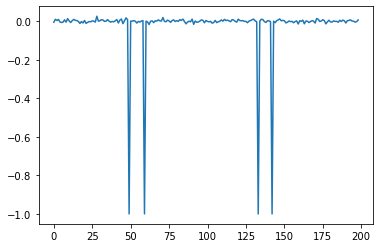

In [21]:
plt.plot(test)
plt.plot(predictions,color='red')

In [22]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1783
Model:                 ARIMA(9, 1, 1)   Log Likelihood                1001.935
Method:                       css-mle   S.D. of innovations              0.138
Date:                Sat, 31 Oct 2020   AIC                          -1979.869
Time:                        18:31:47   BIC                          -1914.037
Sample:                             1   HQIC                         -1955.556
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.945e-06   6.83e-06     -0.285      0.776   -1.53e-05    1.14e-05
ar.L1.D.y     -0.0251      0.024     -1.058      0.290      -0.071       0.021
ar.L2.D.y     -0.0166      0.024     -0.703      0.482      -0.063       0.030
ar.L3.D.y     -0.0129      0.024     -0.547      0.584      -0.059       0.033
ar.L4.D.y      0.2084      0.024      8.829      0.000       0.162       0.255
ar.L5.D.y     -0.0112      0.024     -0.465      0.642      -0.059       0.036
ar.L6.D.y     -0.0159      0.024     -0.674      0.501      -0.062       0.030
ar.L7.D.y     -0.0164      0.024     -0.693      0.488      -0.063       0.030
ar.L8.D.y     -0.0645      0.024     -2.735      0.006      -0.111      -0.018
ar.L9.D.y     -0.0102      0.024     -0.431      0.666      -0.057       0.036
ma.L1.D.y     -0.9995      0.002   -641.265      0.000      -1.003      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2774           -0.4358j            1.3497           -0.0523
AR.2            1.2774           +0.4358j            1.3497            0.0523
AR.3            0.3910           -1.3562j            1.4115           -0.2053
AR.4            0.3910           +1.3562j            1.4115            0.2053
AR.5           -0.3569           -1.3755j            1.4210           -0.2904
AR.6           -0.3569           +1.3755j            1.4210            0.2904
AR.7           -1.4322           -0.3851j            1.4831           -0.4582
AR.8           -1.4322           +0.3851j            1.4831            0.4582
AR.9           -6.0890           -0.0000j            6.0890           -0.5000
MA.1            1.0005           +0.0000j            1.0005            0.0000
-----------------------------------------------------------------------------
"""

In [64]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))

In [65]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) -1710.7322554750012
(0, 0, 1) -1709.5829424107524
(0, 0, 2) -1708.0084399302268
(0, 0, 3) -1706.077330783528
(0, 0, 4) -1774.5509468242317
(0, 1, 0) -573.7385125880032
(0, 1, 1) -1699.3774876714288
(0, 1, 2) -1697.9169414882354
(0, 1, 3) -1695.7090622719315
(0, 1, 4) -1694.3276669748957
(0, 2, 0) 1170.8380068888296
(0, 2, 1) -563.0056517211606
(0, 2, 2) nan
(0, 2, 3) -1646.1931669073765
(1, 0, 0) -1709.549761965818
(1, 0, 1) -1707.7358123616123
(1, 0, 2) -1706.0102712809576
(1, 0, 3) -1724.5939441396522
(1, 0, 4) -1772.9179869672244
(1, 1, 0) -1031.5528838700457
(1, 1, 1) -1698.1549477488907
(1, 1, 2) -1703.4196252703796
(1, 1, 3) -1701.9809973489264
(1, 1, 4) -1712.3998439995585
(1, 2, 0) 240.74259238410013
(1, 2, 3) -1669.8085017318235
(2, 0, 0) -1708.1547583134943
(2, 0, 1) -1706.1724737917075
(2, 0, 2) -1727.1959188265855
(2, 0, 3) -1739.4048931752177
(2, 0, 4) -1772.2695961804748
(2, 1, 0) -1220.6093708280578
(2, 1, 1) -1695.5639616132285
(2, 1, 2) -1701.9863477549206
(2

In [23]:
mean_squared_error(test,predictions)

ValueError: Found input variables with inconsistent numbers of samples: [199, 3]

In [24]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [25]:
test_result=adfuller(data_diff['Gold_Investments']) # adfuller give us 5 values

In [26]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-14.484444120182339, 6.2946847391057544e-27, 26, 1956, {'1%': -3.4336975984464764, '5%': -2.8630187704944223, '10%': -2.567557237266907}, -2050.316696256808)


In [27]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Gold_Investments):
    result=adfuller(Gold_Investments) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [28]:
adfuller_test(data_diff['Gold_Investments'])

ADF Test Statistic : -14.484444120182339
p-value : 6.2946847391057544e-27
#Lags Used : 26
Number of Observations Used : 1956
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [31]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [32]:
model=sm.tsa.statespace.SARIMAX(data_diff['Gold_Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

ValueError: could not broadcast input array from shape (198,2) into shape (198)

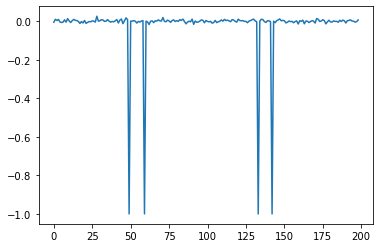

In [33]:
plt.plot(test)
plt.plot(predictions,color='red')

In [34]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [35]:
model=sm.tsa.statespace.SARIMAX(data['Gold_Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


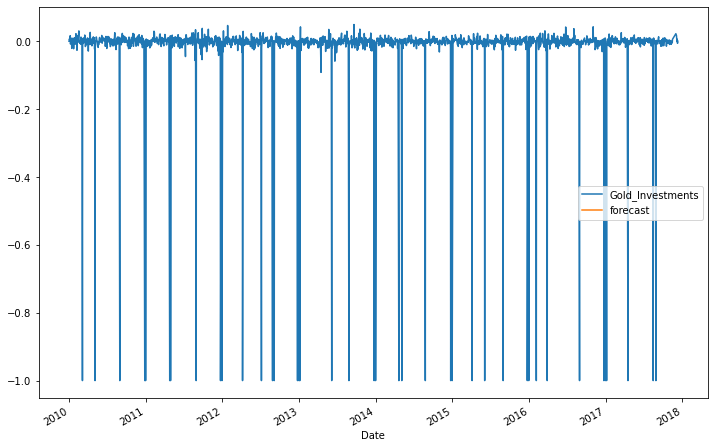

In [36]:
data['forecast']=results.predict(start=1784,end=1984,dynamic=True)
data[['Gold_Investments','forecast']].plot(figsize=(12,8))

In [37]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [38]:
future_datest_data=pd.DataFrame(index=future_dates[:],columns=data.columns)

In [39]:
future_datest_data.tail()

,Gold_Investments,forecast
2021-06-15,NaN,NaN
2021-07-15,NaN,NaN
2021-08-15,NaN,NaN
2021-09-15,NaN,NaN
2021-10-15,NaN,NaN


In [40]:
future_data=pd.concat([data,future_datest_data])

C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\kumar\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2012: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


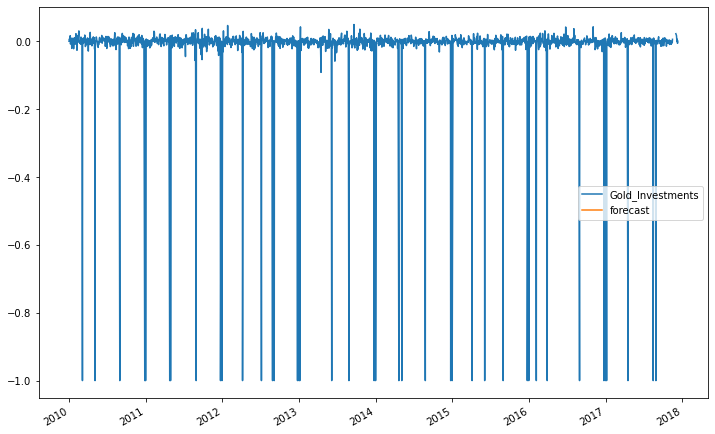

In [41]:
future_data['forecast'] = results.predict(start =1985, end = 2100, dynamic= True)  
future_data[['Gold_Investments', 'forecast']].plot(figsize=(12, 8)) 